## Data Exploration

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Import dataset

In [3]:
df1 = pd.read_csv('hdd0313cy.csv', low_memory=False)

Remove columns that are not known upon admission. Remove rows that are missing relevant data.

In [4]:
columns = ['sex', 'er_mode', 'admtype', 'payer', 'yoa',
          'pay_yb92', 'provider', 'asource', 'moa',
          'service', 'age', 'tot']

df2 = df1.filter(columns)
df2 = df2[df2.age > 0]
df2 = df2[df2.admtype != 4]
df2 = df2[df2.tot > 0]
df2 = df2[df2.sex <= 2]
df2 = df2[False == pd.isna(df2.admtype)]
df2 = df2[False == pd.isna(df2.asource)]
df2 = df2[False == pd.isna(df2.service)]

df2.er_mode = df2.er_mode.fillna(9)

df2.isnull().sum()

sex         0
er_mode     0
admtype     0
payer       0
yoa         0
provider    0
asource     0
moa         0
service     0
age         0
tot         0
dtype: int64

Change datatypes

In [5]:
print(df2.dtypes)
df2['sex'] = df2['sex'].astype(int)
#df2['er_mode'] = df2['er_mode'].astype(str)
#df2['admtype'] = df2['admtype'].astype(str)
#df2['payer'] = df2['payer'].astype(str)
#df2['provider'] = df2['provider'].astype(str)
df2['tot'] = df2['tot'].astype(float)
print('\n')
print(df2.dtypes)

sex         float64
er_mode     float64
admtype     float64
payer        object
yoa           int64
provider      int64
asource      object
moa           int64
service     float64
age         float64
tot           int64
dtype: object


sex           int32
er_mode     float64
admtype     float64
payer        object
yoa           int64
provider      int64
asource      object
moa           int64
service     float64
age         float64
tot         float64
dtype: object


Edit year of addmission collumn

In [6]:
def getFullYear(y):
    if y == 0:
        return 2000
    elif y < 10:
        return int("200"+str(y))
    elif y < 25:
        return int("20"+str(y))
    else:
        return int("19"+str(y))


df2['yoa'] = df2['yoa'].apply(getFullYear)

print(df2['yoa'].head())
print(df2['moa'].head())


0    2003
1    2003
2    2003
3    2003
4    2003
Name: yoa, dtype: int64
0    2
1    1
2    2
3    2
4    1
Name: moa, dtype: int64


In [7]:
df2['doa'] = df2['yoa'] * 12 + df2['moa']
df2['doa'].head()


0    24038
1    24037
2    24038
3    24038
4    24037
Name: doa, dtype: int64

In [8]:
columns.append('doa')
df3 = df2.filter(columns)

In [9]:
print(df3.shape)
print(df3.columns)
print(df3.dtypes)
df3.describe()


(1382692, 12)
Index(['sex', 'er_mode', 'admtype', 'payer', 'yoa', 'provider', 'asource',
       'moa', 'service', 'age', 'tot', 'doa'],
      dtype='object')
sex           int32
er_mode     float64
admtype     float64
payer        object
yoa           int64
provider      int64
asource      object
moa           int64
service     float64
age         float64
tot         float64
doa           int64
dtype: object


,sex,er_mode,admtype,yoa,provider,moa,service,age,tot,doa
count,1.382692e+06,1.382692e+06,1.382692e+06,1.382692e+06,1.382692e+06,1.382692e+06,1.382692e+06,1.382692e+06,1.382692e+06,1.382692e+06
mean,1.587670e+00,4.114896e+00,1.605658e+00,2.007930e+03,7.207281e+03,6.460066e+00,3.407494e+01,5.575278e+01,2.540182e+04,2.410162e+04
std,4.922542e-01,4.250072e+00,8.313449e-01,3.122299e+00,4.313955e+00,3.446818e+00,2.398921e+01,2.343017e+01,3.880319e+04,3.758754e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+03,7.201000e+03,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.400700e+04
25%,1.000000e+00,0.000000e+00,1.000000e+00,2.005000e+03,7.204000e+03,3.000000e+00,1.000000e+01,3.700000e+01,9.307000e+03,2.406900e+04
50%,2.000000e+00,1.000000e+00,1.000000e+00,2.008000e+03,7.205000e+03,6.000000e+00,3.800000e+01,5.800000e+01,1.568200e+04,2.410100e+04
75%,2.000000e+00,9.000000e+00,2.000000e+00,2.011000e+03,7.210000e+03,9.000000e+00,4.000000e+01,7.600000e+01,2.804800e+04,2.413400e+04
max,2.000000e+00,9.000000e+00,9.000000e+00,2.013000e+03,7.216000e+03,1.200000e+01,9.800000e+01,1.240000e+02,4.243255e+06,2.416800e+04


In [10]:
df3.to_csv("df3.csv")

In [12]:
df3.filter(['age', 'tot']).groupby('age').mean().head() ##.plot(kind='bar', x='age', y='tot')

,tot
age,
1.0,15529.309878
2.0,15605.523799
3.0,17375.954982
4.0,17638.219085
5.0,19780.848837


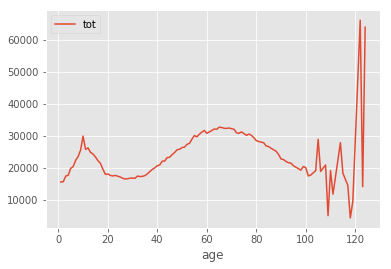

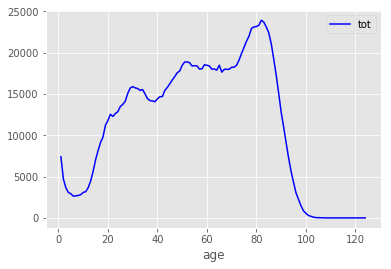

In [13]:
df3.filter(['age', 'tot']).groupby('age').mean().plot(kind='line')
df3.filter(['age', 'tot']).groupby('age').count().plot(kind='line', color='blue')

              tot
sex              
1    28806.845180
2    23012.732104


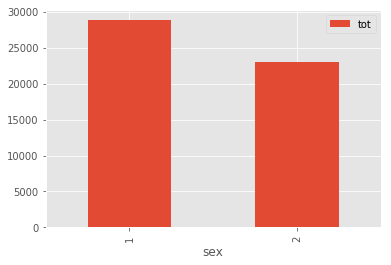

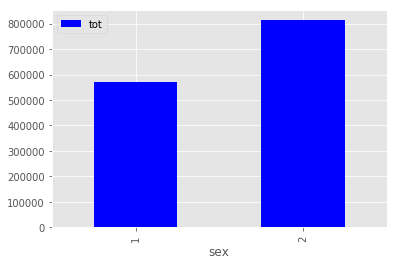

In [14]:
print(df2.filter(['sex', 'tot']).groupby('sex').mean().head())
df3.filter(['sex', 'tot']).groupby('sex').mean().plot(kind='bar')
df3.filter(['sex', 'tot']).groupby('sex').count().plot(kind='bar', color='blue')

## Missing Data

In [15]:
df3.isnull().sum()

sex         0
er_mode     0
admtype     0
payer       0
yoa         0
provider    0
asource     0
moa         0
service     0
age         0
tot         0
doa         0
dtype: int64

                  tot
service              
0.0      48108.694467
2.0      12812.798687
10.0     21223.485259
22.0     18479.482991
38.0     20023.935896
40.0     41854.356772
48.0     24001.638997
50.0     17015.103448
54.0     18583.288294
58.0     31213.263220
62.0     21417.909671
70.0     19579.836188
75.0     10335.406667
76.0      9876.993696
77.0     13434.072322
80.0     21186.279412
98.0     31349.895106
            tot
service        
0.0       11187
2.0       14018
10.0     521789
22.0      56293
38.0     148853
40.0     294140
48.0       4349
50.0       2494
54.0       1495
58.0     100509
62.0      36212
70.0      30596
75.0        300
76.0       6504
77.0     144037
80.0         68
98.0       9848


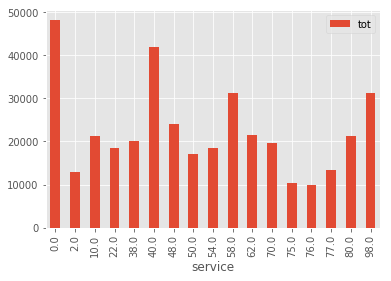

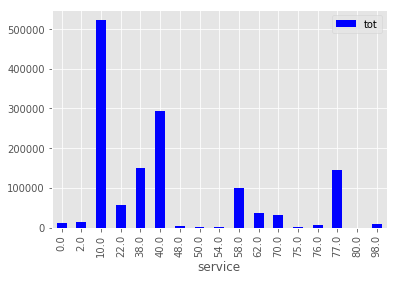

In [16]:
var = 'service'
print(df3.filter([var, 'tot']).groupby(var).mean())
df3.filter([var, 'tot']).groupby(var).mean().plot(kind='bar')
print(df3.filter([var, 'tot']).groupby(var).count())
df3.filter([var, 'tot']).groupby(var).count().plot(kind='bar', color='blue')